<img align="center" src="../extra/logos/logos.png" width='1200px'>

# Carga de datos en el DataCube Chile &#127758;

En este apartado, se verán las operaciones básicas que se pueden realizar con el DataCube:
* Definir una área de estudio
* Buscar productos y mediciones
* Solicitar la información
* Visualizar la información

Aunque, hasta ahora no hemos explicado qué son los Jupyter Notebooks, así que partiremos por ello. Verás que son muy útiles...

***

>**Nota**: Este notebook contiene elementos extraídos desde [DataCube Australia](https://github.com/GeoscienceAustralia/dea-notebooks).

>**Nota**: Si tiene problemas para desplegar este notebook, abra una terminal de Linux (File -> New -> Terminal), navegue hasta la carpeta donde está este notebook y escriba `jupyter trust 01_Carga_datos.ipynb`. Luego, vuelva a abrir el notebook.

***

# Jupyter Notebook &#x1f4d3;

Nacido del acrónimno **Ju**lia + **Pyt**hon + **R**, esta aplicación permite interactuar nativamente con estos tres lenguajes de programación. De momento sólo está instalado Python (**versión 3.10**), aunque se puede habilitar R también. La ventaja de Jupyter es que permite una interacción directa entre código, texto y resultados.

## ¿Cómo funciona?

Los notebooks de Jupyter permiten que el código se separe en secciones que se pueden ejecutar de forma independiente entre sí. Estas secciones se denominan "celdas". 

Puedes viajar entre las celdas con las flechas arriba/abajo de tu teclado. 

Existen 3 tipos de celdas: "Code", "Markdown", "Raw". Puedes elejir el tipo de celda a la derecha del botón &#11208;&#11208;.

El código Python se escribe en celdas individuales de tipo "Code".

Al ejecutar una celda se ejecuta todo el contenido de esta. El resultado de la celda aparacererá directamente debajo de ella. Solo la última salida producida por la celda aparecerá como resultado, por lo que si desea ver el resultado de pasos intermedios, debe separar el código entre multiples celdas o utilizar el comando `print` en las partes de interés.

- a. Para ejecutar una celda en particular, debe seleccionarla y presionar Shift-Enter en el teclado o seleccionar el botón &#11208; "Run the selected cells and advance" en la parte superior del notebook.
- b. Para ejecutar todas las celdas en un notebook, navegue a la pestaña "Run" y luego seleccione "Restart Kernel and Run All Cells...". 

Mira, ¡abajo te mostramos donde tienes que hacer clic para ejecutar celdas!

<img align="center" src="../extra/capturas/intro1.png" height='500px'>

El símbolo `[ ]:`  ubicado a la izquierda de cada celda de código, describe el estado de la celda:

* `[ ]:` significa que la celda aún no se ha ejecutado.
* `[*]:` significa que la celda se está ejecutado.
* `[1]:` significa que la celda ha terminado de ejecutarse. Este número va variando e indica el orden en que las celdas han sido ejecutadas

> **Nota:** Para comprobar si una celda se está ejecutando actualmente, inspeccione el círculo pequeño en la parte superior a la derecha (donde dice Python 3 &#11096;).
El círculo se volverá gris ("Kernel ocupado") cuando la celda se esté ejecutando y volverá a estar vacío ("Kernel inactivo") cuando se complete el proceso.

***
## Tipos de celdas

### Celdas de código (Code)

Todas las operaciones de código se realizan en celdas de código.
Las celdas de código se pueden usar para editar y escribir código nuevo, y realizar cualquier tipo de tarea, como también ejecutar análisis. 
Estas celdas tienen la misma funcionalidad que la consola que provee iPython y algunos de sus comandos ["mágicos"](https://ipython.readthedocs.io/en/stable/interactive/magics.html) se pueden utilizar también.

### Celdas de escritura (Markdown)

Las celdas de Markdown proporcionan el contexto al notebook y permiten que darle una orientación al usuario, ya que permiten describir de manera más extendida y detallada lo que sucede en el código.
Para ver algunas de las opciones de formato para el texto en una celda de Markdown, navegue a la pestaña "Ayuda" de la barra de menú en la parte superior de JupyterLab y seleccione "Markdown Reference".
Existe una amplia gama de opciones de formato de texto, incluidos títulos, puntos, cursiva, hipervínculos, creación de tablas e inclusión de imágenes/figuras. 

### Celdas de escritura (Raw)

Las celdas Raw permiten escribir texto que no será formateado, similar a escribir en un bloc de notas. 

## Guardar cambios

Las modificaciones que se hagan sobre el notebook son guardadas automáticamente cada ciertos minutos. Para guardar los cambios en cualquier momento, haga clic en el icono &#128190; ("save"), en la parte superior izquierda del notebook.

***

# Explorar productos y mediciones &#128752;

Se puede tener una idea de los productos y la cobertura de las imágenes disponibles en el cubo en el [Explorador de imágenes](https://explorer.datacubechile.cl/).
Dentro de la nomenclatura de DataCube, se habla de productos y mediciones:

1. **Productos**: corresponden a los sensores. Por ejemplo, en el caso de Landsat-8, es una plataforma (satélite) que tiene dos sensores asociados, uno óptico (Operational Land Imager, OLI), que corresponde al producto `landsat8_c2l2_sr` y uno termal (Thermal Infrared Sensor, TIRS), que corresponde al producto `landsat8_c2l2_st`. Adicionalmente, hay un tercer producto para esta misma plataforma, que se llama `landsat8_geomedian_annual`. Todos estos productos son de la colección y nivel 2, pero podrían agregarse otros productos para la misma plataforma de otras colecciones y niveles.
2. **Mediciones**: corresponden a las bandas que tiene cada producto. Cada banda abarca un rango específico del espectro electromagnético que es capturado por los distintos componentes del sensor y almacenado en matrices independientes. También pueden existir mediciones auxiliares, que indican calidad u otras características relevantes. Siguiendo con el ejemplo anterior, `landsat8_c2l2_sr` tiene un total de 10 mediciones, 3 de las cuales corresponden a bandas de calidad.

***

## Cargar paquetes relevantes

La celda a continuación carga los paquetes que permiten acceder al DataCube y sus funcionalidades.

In [1]:
import datacube
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

from odc.ui import DcViewer
from datacube.utils import masking
from datacube.utils.rio import configure_s3_access

In [2]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
client = Client(cluster)

configure_s3_access(aws_unsigned=False, requester_pays=True, client=client)

client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 29.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38387,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 29.00 GiB
Comm: tcp://127.0.0.1:35345,Total threads: 2
Dashboard: http://127.0.0.1:42869/status,Memory: 7.25 GiB
Nanny: tcp://127.0.0.1:38313,


Partimos importando todas las librerías y funciones que vamos a necesitar.

Importamos las librerías:
- `datacube`: la librería principal de datacube.
- `xarray`: para representar las imágenes,
- `numpy`: la típica librería de cálculo científico.
- `pandas`: para manejo y analisis de datos.
- `matplotlib`: para plotear visualizaciones de datos e imágenes.
- `odc`: un componente de la librería datacube que tiene funciones de procesamiento de imágenes.

La última linea `configure_s3_access(aws_unsigned=False, requester_pays=True)` permite acceder a los buckets de S3 en donde están almacenados los datos del cátalogo de Open Data de AWS (Landsat y Sentinel-2).

Al iniciar, es necesario generar una app del cubo con un nombre. Esto no afecta en nada el desempeño y solo cumple motivos de trazabilidad en caso de algún problema. El nombre puede ser de cualquier tipo, pero se recomienda que sea algo relacionado con la aplicación que se le dará:

In [3]:
dc = datacube.Datacube(app='SAMSARA_cargar_datos')

***

## Explorar productos

Una vez se tiene la app funcionando (en este caso `dc`), se pueden listar los productos disponibles.

> **Nota:** Para explorar documentación sobre listar productos haga [click aquí](https://opendatacube.readthedocs.io/en/latest/api/indexed-data/generate/datacube.Datacube.list_products.html#datacube.Datacube.list_products).

Actualmente está disponible la serie completa de Landsat (5, 7 y 8), Sentinel-2 y el DEM SRTM.

***

## Explorar mediciones

Cada producto contiene mediciones (`measurements`) a las cuáles es posible acceder. A continuación se muestra un listado de las mediciones disponibles para dos sensores (Landsat 8 y Sentinel-2)

> **Nota:** Para explorar documentación sobre listar mediciones haga [click aquí](https://opendatacube.readthedocs.io/en/latest/api/indexed-data/generate/datacube.Datacube.list_measurements.html#datacube.Datacube.list_measurements)

In [4]:
products = ['landsat8_c2l2_sr', 's2_l2a']
dc.list_measurements().loc[products]

name   dtype        units   nodata  \
product          measurement                                             
landsat8_c2l2_sr coastal         coastal  uint16  reflectance      0.0   
                 blue               blue  uint16  reflectance      0.0   
                 green             green  uint16  reflectance      0.0   
                 red                 red  uint16  reflectance      0.0   
                 nir08             nir08  uint16  reflectance      0.0   
                 swir16           swir16  uint16  reflectance      0.0   
                 swir22           swir22  uint16  reflectance      0.0   
                 qa_pixel       qa_pixel  uint16    bit_index      1.0   
                 qa_aerosol   qa_aerosol   uint8    bit_index      1.0   
                 qa_radsat     qa_radsat  uint16    bit_index  65535.0   
s2_l2a           coastal         coastal  uint16            1      0.0   
                 blue               blue  uint16            1      0.0   
                 green             green  uint16            1      0.0   
                 red                 red  uint16            1      0.0   
                 rededge1       rededge1  uint16            1      0.0   
                 rededge2       rededge2  uint16            1      0.0   
                 rededge3       rededge3  uint16            1      0.0   
                 nir                 nir  uint16            1      0.0   
                 nir08             nir08  uint16            1      0.0   
                 nir09             nir09  uint16            1      0.0   
                 swir16           swir16  uint16            1      0.0   
                 swir22           swir22  uint16            1      0.0   
                 scl                 scl   uint8            1      0.0   
                 aot                 aot  uint16            1      0.0   
                 wvp                 wvp  uint16            1      0.0   

                                                                     aliases  \
product          measurement                                                   
landsat8_c2l2_sr coastal                [SR_B1, band_1, B1, coastal_aerosol]   
                 blue                                    [SR_B2, band_2, B2]   
                 green                                   [SR_B3, band_3, B3]   
                 red                                     [SR_B4, band_4, B4]   
                 nir08                              [SR_B5, band_5, B5, nir]   
                 swir16                           [SR_B6, band_6, B6, swir1]   
                 swir22                           [SR_B7, band_7, B7, swir2]   
                 qa_pixel     [pixel_quality, level2_qa, QA_PIXEL, pixel_qa]   
                 qa_aerosol          [sr_aerosol, SR_QA_AEROSOL, aerosol_qa]   
                 qa_radsat             [saturation_qa, QA_RADSAT, radsat_qa]   
s2_l2a           coastal                     [B01, band_01, coastal_aerosol]   
                 blue                                         [B02, band_02]   
                 green                                        [B03, band_03]   
                 red                                          [B04, band_04]   
                 rededge1                         [B05, band_05, red_edge_1]   
                 rededge2                         [B06, band_06, red_edge_2]   
                 rededge3                         [B07, band_07, red_edge_3]   
                 nir                                   [B08, band_08, nir_1]   
                 nir08                     [B8A, band_8a, nir_narrow, nir_2]   
                 nir09                          [B09, band_09, water_vapour]   
                 swir16                      [B11, band_11, swir_1, swir_16]   
                 swir22                      [B12, band_12, swir_2, swir_22]   
                 scl                                         [SCL, mask, qa]   
                 aot                 

Cada una de estas filas se corresponde con una "banda" del sensor. Como se puede apreciar, no todas corresponden a mediciones directas realizadas por el sensor. En el caso de Landast y Sentinel, siempre están presentes bandas de calidad. También hay algunos sub-productos en algunos casos.

Hay que prestar atención a las columnas `dtype`, `units` y `nodata`. En ellas se indican el tipo de dato (entero corto, largo, flotante, etc), las unidades, y el valor de datos NA, respectivamente. Hay que tenerlos presente al momento de trabajar con alguna de estas métricas. Por ejemplo, las bandas de reflectancia poseen tipo entero (uint16), pero la reflectancia posee valores en el rango `[0-1]`; es por esta razón que es necesario escalar la información (10.000 en este caso).

***

# Definir solicitud &#x1f4dd;

Para poder cargar las imágenes deseadas, es necesario definir algunos puntos primero:

1. Definir producto (sensor)
1. Definir mediciones requeridas (bandas)
1. Definir ventana temporal de trabajo (rango)
1. Definir ventana espacial de trabajo (extensión: latitud, longitud)
1. Definir una proyección espacial de salida (códigos EPSG)
1. Definir una resolución espacial de salida (grano)

Los productos y mediciones ya fueron expuestos en las secciones 2.3 y 2.4. 

La ventana temporal de trabajo corresponde al rango en formato "YYYY-MM-DD" (Año-Mes-Día). Este rango puede ser mayor al rango de imágenes disponible para el producto y debe ser especificado de la siguiente manera `("2020-01-01", "2020-12-31")`. Esto quiere decir, desde el 01 de enero del 2020 al 31 de diciembre del 2020.

La ventana espacial de trabajo corresponde a la extensión geográfica cuyas coordenadas se proporcionan en grados decimales. Por ejemplo si quisiera capturar el área metropolitana de Santiago de Chile, debo proporcionar la latitud (eje y) como `(-34.0, -33.0)`, y la longitud (eje x) como `(-71.0, -70.0)`.

La proyección espacial de salida se especifica siguiendo los códigos EPSG, para indicar que utilizaremos UTM en zona 19 Sur debemos escribir `"EPSG:32719"`. Puede explorar la siguiente página para más opciones [ESPG](https://epsg.io/)

La resolución espacial de salida se puede solicitar con valores diferente a la resolución nativa. Para ello, basta con modificar la opción de resolución a la deseada. Por defecto, se utiliza el método de remuestreo "nearest neighbour", pero los siguientes están también disponibles (agregando por ejemplo, la opción `resampling= "cubic"`:
```
"nearest", "cubic", "bilinear", "cubic_spline", "lanczos", 
"average", "mode", "gauss", "max", "min", "med", "q1", "q3"
```
>**Nota**: Las unidades de la opción `resolution` corresponden a las unidades del crs específicado en `output_crs`. Hay que prestar atención a que normalmente el primer elemento es negativo, dada la forma en que se almacenan las coordenadas en las imágenes (el inicio está esquina superior izquierda) y la forma en que operan la mayoría de los crs (con un "inicio" en la esquina inferior izquierda).

También es posible añadir la opción `group_by= "solar_day"` para que escenas de diferentes horas (diferentes 'tiles'), pero un mismo día queden en el cubo como si fuera una sola gran escena (si pertecene al mismo día).

Siguiendo lo ya mencionado, podemos solicitar todas las mediciones (bandas) de landsat 8 para Santiago en el año 2020.

In [5]:
neighbor_radius = 50
smooth_radius = 15
glcm_radius = 7
max_radius = np.max(np.array([neighbor_radius, smooth_radius, glcm_radius])) + 5

In [6]:
poly = gpd.read_file('denuncias.gpkg').to_crs(epsg = "32719")
poly = poly[poly.id == 431] # Solo Poligono de Peñalolen
buf_poly = poly.buffer(distance = 30*max_radius) # 5 pixeles de 30x30 resolucion.

In [7]:
xmin, ymin, xmax, ymax = buf_poly.total_bounds

<Axes: >

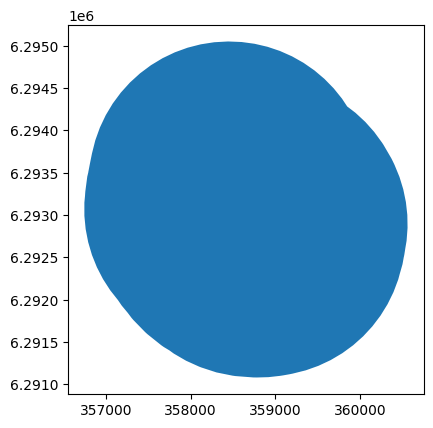

In [8]:
buf_poly.plot()

In [9]:
buf_poly.explore()

In [10]:
query = {"product": 'landsat9_c2l2_sr',
         # "measurements": ['red', 'nir08', 'qa_pixel'],
         "x": (xmin, xmax),
         "y": (ymin, ymax),
         "time": ("2023-10-01", "2024-01-07"),
         "output_crs": 'EPSG:32719',
         "crs": 'EPSG:32719',
         "resolution": (-30,30),
         "group_by": 'solar_day',
         "dask_chunks": {"x": 1500, "y": 1500},
         "skip_broken_datasets": True}

Desde el query anterior queda pendiente definir la utilización de "dask_chunks". Esto se realizará en notebooks más avanzados.

***

# Solicitar datos &#128389;

Utilizaremos el query anterior para cargar el requerimiento al cubo de la siguiente forma:

In [11]:
ds = dc.load(**query)

***

# Explorar datos solicitados &#128270;

El objeto `ds` contiene los datos solicitados almacenado como `xarray.Dataset`.

`OpenDataCube` funciona sobre la librería [`xarray`](https://xarray-contrib.github.io/xarray-tutorial/scipy-tutorial/00_overview.html), la cual permite trabajar en multiples dimensiones de manera eficiente. La estructura de datos es muy similar al formato [NetCDF](https://psl.noaa.gov/data/gridded/whatsnetCDF.html) y una de las principales ventajas, es que permite trabajar con la librería [`Dask`](https://dask.org/), la cual permite paralelizar cargas de trabajo.

In [12]:
ds

<xarray.Dataset>
Dimensions:      (time: 6, y: 134, x: 128)
Coordinates:
  * time         (time) datetime64[ns] 2023-10-09T14:33:49.638217 ... 2023-12...
  * y            (y) float64 6.295e+06 6.295e+06 ... 6.291e+06 6.291e+06
  * x            (x) float64 3.567e+05 3.568e+05 ... 3.605e+05 3.606e+05
    spatial_ref  int32 32719
Data variables:
    coastal      (time, y, x) uint16 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    blue         (time, y, x) uint16 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    green        (time, y, x) uint16 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    red          (time, y, x) uint16 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    nir08        (time, y, x) uint16 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    swir16       (time, y, x) uint16 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    swir22       (time, y, x) uint16 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    qa_pixel     (time, y, x) uint16 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    qa_aerosol   (time, y, x) uint8 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    qa_radsat    (time, y, x) uint16 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
Attributes:
    crs:           EPSG:32719
    grid_mapping:  spatial_ref

La ejecución de la celda anterior nos muestra el contenido del objeto `ds`:

1. ***Dimensions***: es un listado simple, que identifica las dimensiones del arreglo. En este caso es tridimencinoal con (tiempo, latitud, longitud), pero cualquier otra combinación es posible (1, 2, 3, 4, ..., X dimensiones).
1. ***Coordinates***: identifica el valor de cada una de las dimensiones, en cada uno de sus "instantes". En este caso `time` representa la fecha para cada tiempo, `x` e `y` son las coordenadas geográficas de cada pixel.
1. ***Data variables***: son las mediciones, normalmente "bandas" del sensor, pero puede ser cualquier otro tipo. En este caso, por cada unidad `time`, existe una imagen completa con coordenadas `x`, `y` (un objeto `xarray.DataArray`).
1. ***Attributes***: identifica el sistema de coordenadas de referencia de la información cargada.

Se puede ver con mayor detalle alguna de las variables/mediciones. En el fondo esta una colección dentro de otra.

In [13]:
ds['red']
# ds.red

<xarray.DataArray 'red' (time: 6, y: 134, x: 128)>
dask.array<dc_load_red, shape=(6, 134, 128), dtype=uint16, chunksize=(1, 134, 128), chunktype=numpy.ndarray>
Coordinates:
  * time         (time) datetime64[ns] 2023-10-09T14:33:49.638217 ... 2023-12...
  * y            (y) float64 6.295e+06 6.295e+06 ... 6.291e+06 6.291e+06
  * x            (x) float64 3.567e+05 3.568e+05 ... 3.605e+05 3.606e+05
    spatial_ref  int32 32719
Attributes:
    units:         reflectance
    nodata:        0
    crs:           EPSG:32719
    grid_mapping:  spatial_ref

El objeto anterior corresponde a un subconjunto de `ds`, correspondiente a la banda roja almacenada como `xarray.DataArray`. 

Es importante resaltar algunos aspectos respecto a la salida anterior.

1. **Bytes**: Tamaño total de la colección, y el tamaño de cada chunk.
1. **Shape**: Dimensiones del arreglo. En este caso es (tiempo, y, x) para toda la colección solicitada y para cada chunk. En este último caso, un chunk sólo abarca un tiempo según lo definido en el query.
1. **Data type**: tipo de datos (entero, flotante, etc) y estructura (numpy array, dask array, etc).

Por lo demás, las coordenadas y atributos son similares al objeto anterior.

Un punto importante sobre el funcionamiento del DataCube, es que `xarray` es *lazy*, lo que quiere decir que no hace todo los cálculos en el momento en que se escribe, si no que lo hace sólo cuando es necesario. Es importante tener esto presente, porque por cada acción que se le solicita al cubo, se van acumulando tareas y si se llega a un número demasiado alto, al momento de hacer un cálculo tomará demasiado tiempo y el sistema podría colapsar.

En otros tutoriales ahondaremos más en Dask; es un tema importante, pero extenso.

***

***

# Enmascarar valores no válidos y/o no requeridos

Al realizar cualquier análisis es recomendable enmascarar tanto ciertos valores que de antemano se conocen como inválidos, como ciertos elementos que no sean requeridos, debido a que su inclusión puede llevarnos a mal interpretar resultados. Por ejemplo, en un estudio de la dinámica de la vegetación un sensor pudo captar una nube en un momento determinado, y esa nube puede contaminar los valores de determinados índices. 

La mayoría de los sensores más tradicionales incorporan dentro de sus mediciones una banda de calidad que indica, entre otras cosas, la presencia de nubes en un pixel determinado. Utilizando dicha banda se pueden aislar los píxeles dentro de cada escena que no tengan información de interés, en vez de descartar la escena completa. Estas bandas de calidad son calculadas por cada proveedor y dependen de los algoritmos de corrección atmosférica de los que se disponen y, si bien son muy útiles, **no** son completamente infalibles.

Primero, importamos la librería de enmascaramiento, y luego, vemos una descripción de la banda de calidad con la que cuenta Landsat 9:


In [14]:
masking.describe_variable_flags(ds.qa_pixel)

,bits,values,description
snow,5,"{'0': 'not_high_confidence', '1': 'high_confid...",NaN
clear,6,"{'0': 'not_clear', '1': 'clear'}",NaN
cloud,3,"{'0': 'not_high_confidence', '1': 'high_confid...",NaN
water,7,"{'0': 'land_or_cloud', '1': 'water'}",NaN
cirrus,2,"{'0': 'not_high_confidence', '1': 'high_confid...",NaN
nodata,0,"{'0': False, '1': True}",NaN
qa_pixel,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","{'1': 'Fill', '2': 'Dilated Cloud', '4': 'Cirr...",Level 2 pixel quality
cloud_shadow,4,"{'0': 'not_high_confidence', '1': 'high_confid...",NaN
dilated_cloud,1,"{'0': 'not_dilated', '1': 'dilated'}",NaN
cloud_confidence,"[8, 9]","{'0': 'none', '1': 'low', '2': 'medium', '3': ...",NaN


In [15]:
# información básica para saar las nubes
reflectance_bands = ["coastal", "blue", "green", "red", "nir08", "swir16", "swir22"]
quality_band = 'qa_pixel'


# identificar que vamos a dejar o sacar
good_pixel_flags = {
    "snow": "not_high_confidence",
    "cloud": "not_high_confidence",
    "cirrus": "not_high_confidence",
    "cloud_shadow": "not_high_confidence",
    "nodata": False
}

# hacer la máscara
cloud_free_mask = masking.make_mask(ds[quality_band], **good_pixel_flags)
masked = ds[reflectance_bands].where(cloud_free_mask)

# normalización de la reflectancia
masked.update(masked*0.0000275 + -0.2)

<xarray.Dataset>
Dimensions:      (time: 6, y: 134, x: 128)
Coordinates:
  * time         (time) datetime64[ns] 2023-10-09T14:33:49.638217 ... 2023-12...
  * y            (y) float64 6.295e+06 6.295e+06 ... 6.291e+06 6.291e+06
  * x            (x) float64 3.567e+05 3.568e+05 ... 3.605e+05 3.606e+05
    spatial_ref  int32 32719
Data variables:
    coastal      (time, y, x) float32 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    blue         (time, y, x) float32 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    green        (time, y, x) float32 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    red          (time, y, x) float32 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    nir08        (time, y, x) float32 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    swir16       (time, y, x) float32 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    swir22       (time, y, x) float32 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
Attributes:
    crs:           EPSG:32719
    grid_mapping:  spatial_ref

# Visualización &#128506;

La visualización de información es una etapa crucial en el manejo de información satelital. En este apartado se verá como desplegar la zona de estudio, mostrar una banda en particular y generar algunos compuestos.


## Bandas

Para visualizar bandas individuales utilizaremos `matplotlib`, una librería clásica de Python que está completamente integrada con `xarray`. Esta librería puede ser llamada de manera tradicional o como un método dentro del arreglo.

Como ya exploramos la banda roja del objeto `ds`, ahora exploraremos la primera imagen de esta banda utilizando el siguiente código:

In [16]:
primera_roja = masked['red'].isel(time = 0)
primera_roja

<xarray.DataArray 'red' (y: 134, x: 128)>
dask.array<getitem, shape=(134, 128), dtype=float32, chunksize=(134, 128), chunktype=numpy.ndarray>
Coordinates:
    time         datetime64[ns] 2023-10-09T14:33:49.638217
  * y            (y) float64 6.295e+06 6.295e+06 ... 6.291e+06 6.291e+06
  * x            (x) float64 3.567e+05 3.568e+05 ... 3.605e+05 3.606e+05
    spatial_ref  int32 32719

Del resultado anterior destacamos:

1. Como se seleccionó una unidad de tiempo en particular, dicha dimensión fue descartada del arreglo (ahora posee dimensiones `x`, `y` solamente. El tiempo (`time`), pasó a ser una etiqueta informativa solamente.
2. Se utilizó `isel`, que realiza una selección por ubicación y no por el valor. En este caso `.isel(time=0)` selecciona la primera fecha disponible. `.isel=1` seleccionará la segunda fecha disponible y así hasta el largo de la dimensión. Para seleccionar por el valor y no la posición se utiliza `sel`, que en este caso sería `sel='2022-01-14'`.

>**Nota**: Es importante notar que Python cuenta la posición en los arreglos de cualquier tipo, partiendo por 0. Así, para acceder al primer elemento de un vector (por ejemplo `mi_vector`) de largo 10, se utiliza `mi_vector[0]`; para acceder al último elemento, se puede utilizar `mi_vector[9]` o `mi_vector[-1]`. Si se utiliza `mi_vector[10]` arrojará un error porque no encuentra el elemento.

Para graficar el objeto `primera_roja`, basta con usar el método `plot()` del objeto:

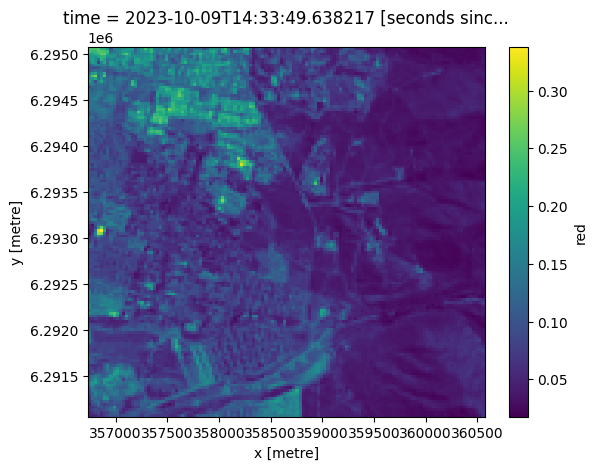

In [17]:
primera_roja.plot()

Para visualizar más escenas en un mismo plot se puede utilizar el siguiente código:

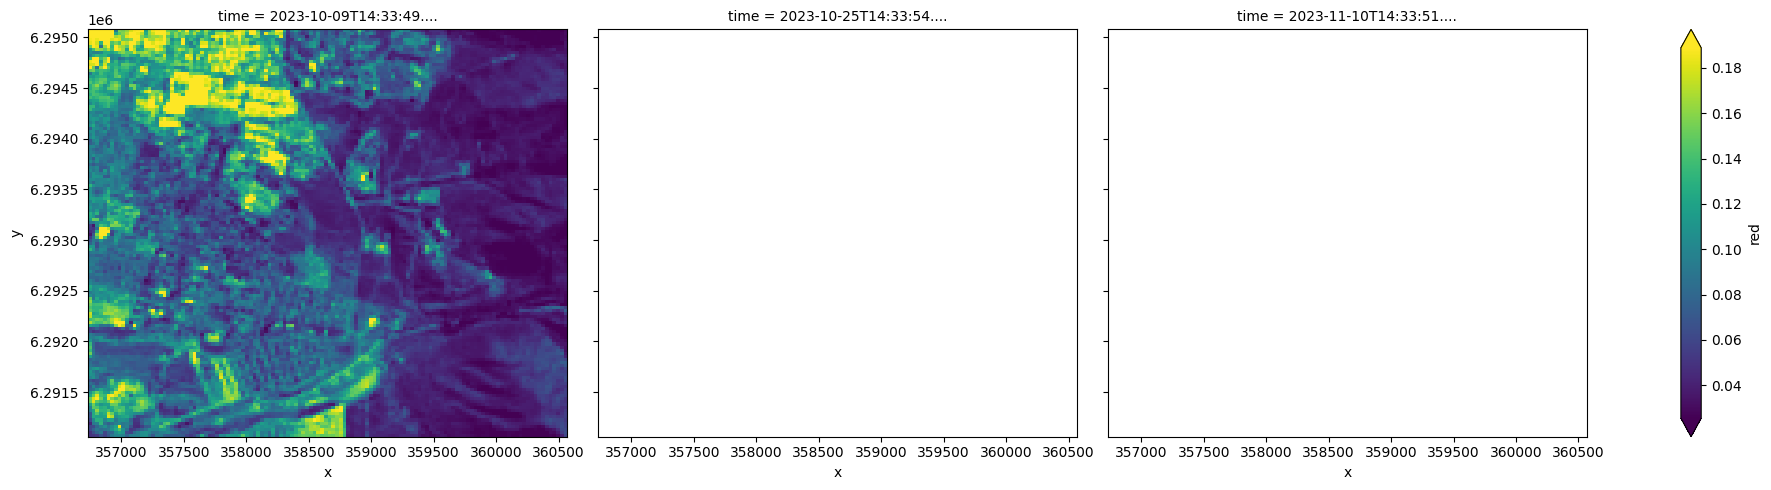

In [18]:
masked['red'].isel(time=range(3)).plot(col='time', figsize=(20, 5), robust=True)

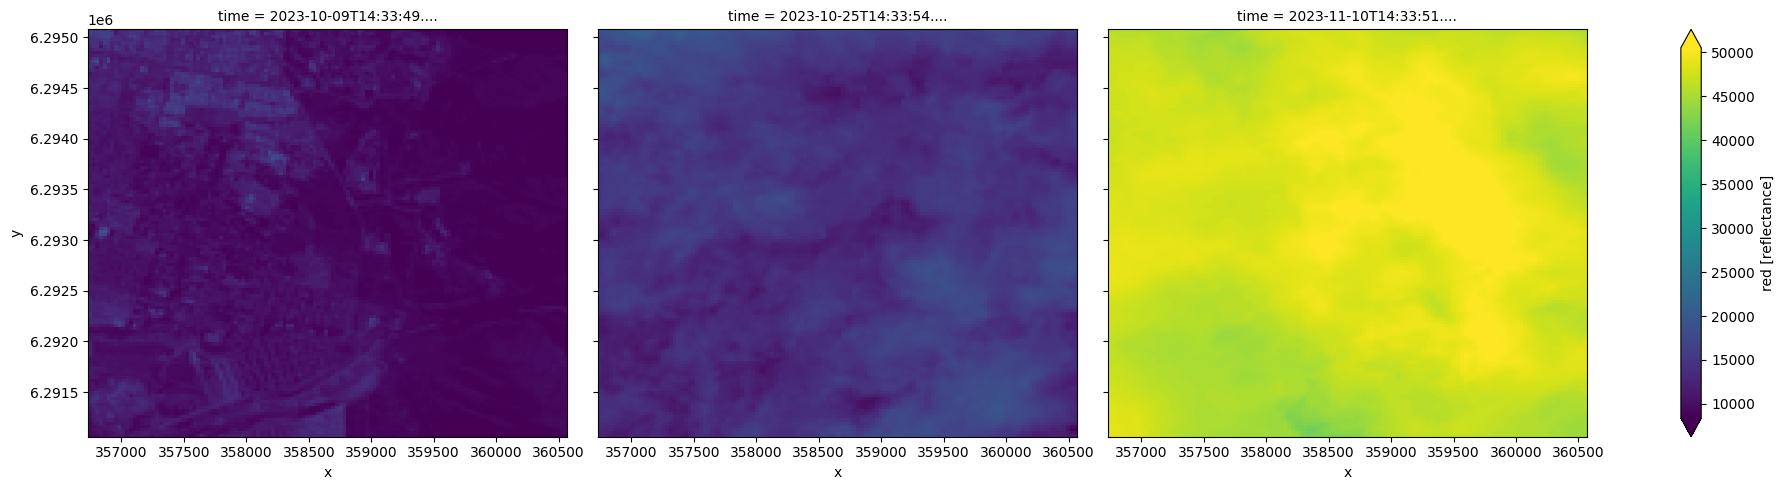

In [19]:
ds['red'].isel(time=range(3)).plot(col='time', figsize=(20, 5), robust=True)

Podemos continuar agregando argumentos y ajustando parámetros para mejorar la visualización, tal como el siguiente ejemplo:

Para mayor información sobre este tipo de gráficos, revisar la [documentación de xarray](http://xarray.pydata.org/en/stable/user-guide/plotting.html#faceting)

## Falso color

Visualizar la escena en colores, tal como lo harían nuestros ojos, es un poco más complicado.
Para esto utilizamos la técnica de falso color, que permite combinar tres bandas para construir una imagen en colores RGB (Red - Green - Blue).

Exploraremos 2 formas:
1. La función `rgb` es una función extra, parte del ecosistema de ODC, que permite visualizar fácilmente una imagen en colores RGB de un dataset.

2. Utilizando `matplotlib`, es una forma más manual pero que permite mayor control.

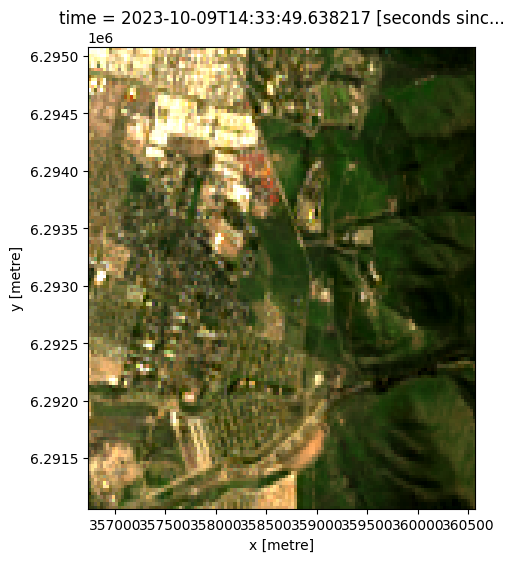

In [20]:
masked[["red", "green", "blue"]].isel(time=0).to_array().plot.imshow(robust=True, figsize=(5, 6)) # vmin = X, vmax = X

3. Utilizando `holoviews`, una librería que permite una mayor dinamismo y velocidad al momento de visualizar una imagen. Es más compleja de utilizar, pero tiene varias ventajas para el usuario final.

In [21]:
import holoviews as hv
import hvplot.xarray
from datashader import reductions

Este código es para visualizar una sola banda:

In [22]:
masked['red'].hvplot.image(
     x = 'x', y = 'y',                        # Dataset x,y dimension names 
     rasterize = True,                        # If False, data will not be reduced. This is slow to load but all data is loaded.
     aggregator = reductions.mean(),          # Datashader calculates the mean value for reductions (also first, min, max, las, std, mode)
     precompute = True,                       # Datashader precomputes what it can
     width = 600,
     height = 450,
     data_aspect = 0,
     cmap = 'inferno'
    )

:DynamicMap   [time]
   :Image   [x,y]   (red)

# Calcular índices espectrales

Los índices espectrales (vegetación, agua, nieve, etc.) son ampliamente utilizados para identificar con mayor facilidad las estructuras que se desean estudiar. Estos índices se crean a partir de una combinación de bandas espectrales, aquí revisaremos algunos de los índices más populares.

## NDVI

El NDVI ([Normalised Difference Vegetation Index](https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index)), es uno de los índices para detectar vegetación más populares, y ha sido ampliamente utilizado durante décadas. Este índice obedece a la siguiente fórmula:

$$\text{NDVI} = \frac{NIR-Red}{NIR + Red}$$

Siendo $NIR$ la reflectancia en el infrarrojo cercano y $Red$ la reflectancia en la banda roja. Este índice, puede tomar valores que van desde -1 a 1, siendo valores altos indicadores de mayor vegetación/vigor, valores cercanos a 0 suelo desnudo y valores negativos obedecen normalmente a cuerpos de agua, entre otros.

In [23]:
ndvi = (masked['nir08'] - masked['red']) / (masked['nir08'] + masked['red'])
ndvi.attrs = ds['red'].attrs  # para mantener atributos geoespaciales
ndvi

<xarray.DataArray (time: 6, y: 134, x: 128)>
dask.array<truediv, shape=(6, 134, 128), dtype=float32, chunksize=(1, 134, 128), chunktype=numpy.ndarray>
Coordinates:
  * time         (time) datetime64[ns] 2023-10-09T14:33:49.638217 ... 2023-12...
  * y            (y) float64 6.295e+06 6.295e+06 ... 6.291e+06 6.291e+06
  * x            (x) float64 3.567e+05 3.568e+05 ... 3.605e+05 3.606e+05
    spatial_ref  int32 32719
Attributes:
    units:         reflectance
    nodata:        0
    crs:           EPSG:32719
    grid_mapping:  spatial_ref

In [24]:
masked['ndvi'] = (masked['nir08'] - masked['red']) / (masked['nir08'] + masked['red'])
masked

<xarray.Dataset>
Dimensions:      (time: 6, y: 134, x: 128)
Coordinates:
  * time         (time) datetime64[ns] 2023-10-09T14:33:49.638217 ... 2023-12...
  * y            (y) float64 6.295e+06 6.295e+06 ... 6.291e+06 6.291e+06
  * x            (x) float64 3.567e+05 3.568e+05 ... 3.605e+05 3.606e+05
    spatial_ref  int32 32719
Data variables:
    coastal      (time, y, x) float32 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    blue         (time, y, x) float32 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    green        (time, y, x) float32 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    red          (time, y, x) float32 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    nir08        (time, y, x) float32 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    swir16       (time, y, x) float32 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    swir22       (time, y, x) float32 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    ndvi         (time, y, x) float32 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
Attributes:
    crs:           EPSG:32719
    grid_mapping:  spatial_ref

/env/lib/python3.10/site-packages/rasterio/warp.py:344: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  _reproject(


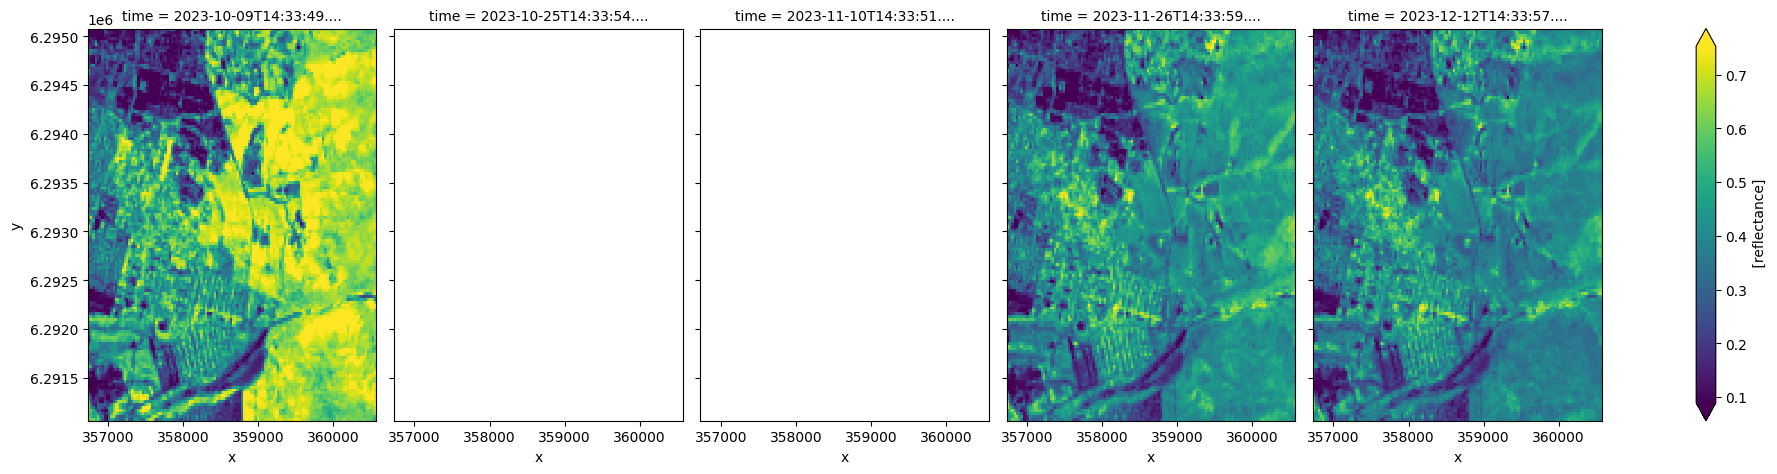

In [25]:
ndvi.isel(time=range(5)).plot(col='time', figsize=(20, 5), robust=True)

## Tasseled Cup

Otro ejemplo son las transformaciones Tasseled Cap (Kauth y Thomas, 1976) , que tienen como objetivo mejorar el análisis de la vegetación y otros componentes espaciales. La forma de aplicarla es hacer “combinaciones lineales” de la información de las bandas originales de una escena. El producto final de esta transformación es un nuevo set de bandas que tienen una interpretación específica. Generalmente, se utilizan tres combinaciones: Brillo (Brightness), Verdor (Greenness) y Humedad (Wetness). La principal desventaja de esta transformación es que solo puede ser aplicada sobre sensores que han desarrollado coeficientes de transformación (ejemplo: Landsat). __Los coeficientes que se utilizan para esta ransformación varían entre sensores__. Para Landsat 8:

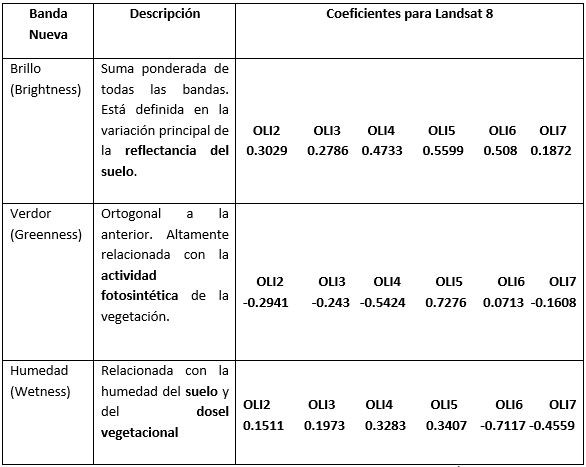



In [26]:
# crear cala tasseled cup componente por separado
masked['Brillo']  = (masked.blue*0.3029 +    masked.green*0.2786 +   masked.red*0.4733 +    masked.nir08*0.5599 + masked.swir16*0.508 +     masked.swir22*0.1872)
masked['Verdor']  = (masked.blue*(-0.2941) + masked.green*(-0.243) + masked.red*(-0.5424) + masked.nir08*0.7276 + masked.swir16*0.0713 +    masked.swir22*(-0.1608))
masked['Humedad'] = (masked.blue*0.1511 +    masked.green*0.1973 +   masked.red*0.3283 +    masked.nir08*0.3407 + masked.swir16*(-0.7117) + masked.swir22*(-0.4559))
masked

<xarray.Dataset>
Dimensions:      (time: 6, y: 134, x: 128)
Coordinates:
  * time         (time) datetime64[ns] 2023-10-09T14:33:49.638217 ... 2023-12...
  * y            (y) float64 6.295e+06 6.295e+06 ... 6.291e+06 6.291e+06
  * x            (x) float64 3.567e+05 3.568e+05 ... 3.605e+05 3.606e+05
    spatial_ref  int32 32719
Data variables:
    coastal      (time, y, x) float32 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    blue         (time, y, x) float32 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    green        (time, y, x) float32 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    red          (time, y, x) float32 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    nir08        (time, y, x) float32 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    swir16       (time, y, x) float32 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    swir22       (time, y, x) float32 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    ndvi         (time, y, x) float32 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    Brillo       (time, y, x) float32 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    Verdor       (time, y, x) float32 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
    Humedad      (time, y, x) float32 dask.array<chunksize=(1, 134, 128), meta=np.ndarray>
Attributes:
    crs:           EPSG:32719
    grid_mapping:  spatial_ref

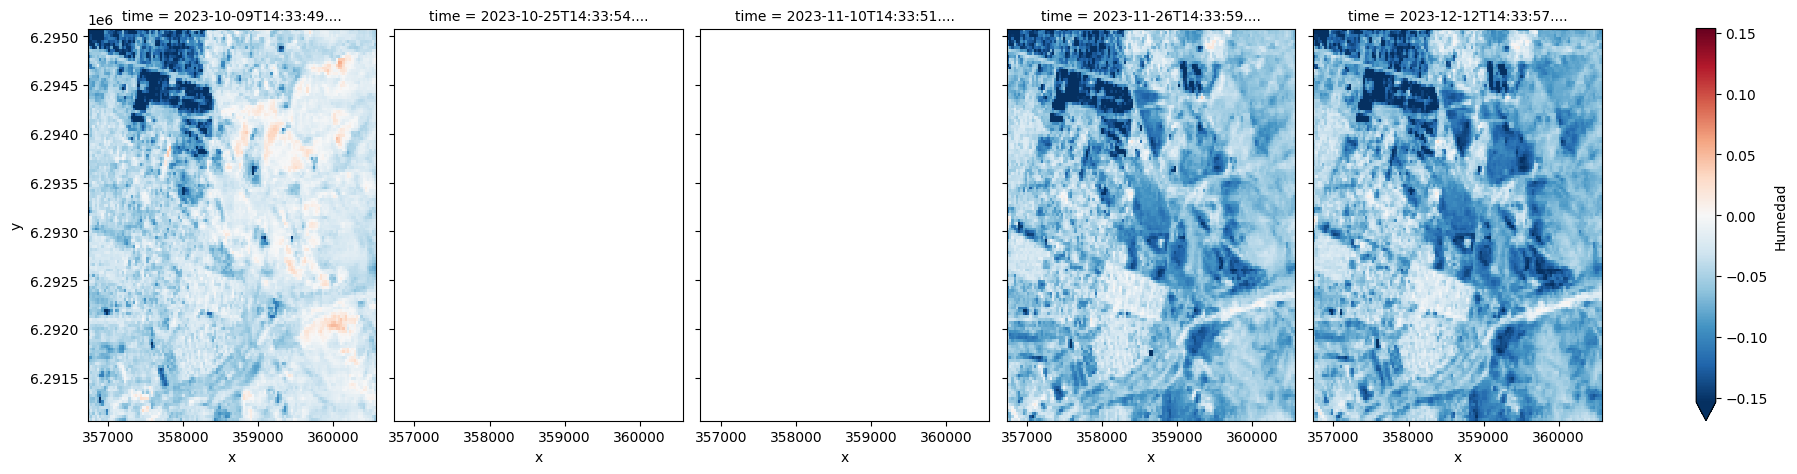

In [27]:
masked['Humedad'].isel(time=range(5)).plot(col='time', figsize=(20, 5), robust=True)

***

# Realizar compuestos

Dentro de las funcionalidades disponibles, también es posible generar compuestos o productos agregados, como el promedio, mediana, varianza, máximo, etc, a través de alguna dimensión en particular del cubo, usualmente el tiempo.

De esta forma, podemos calcular por ejemplo, una imagen anual promedio para cada banda, utilizando todas las escenas disponibles. Si por ejemplo se cuenta con 30 escenas en un año, al calcular el promedio anual, se termina generando una única escena donde en cada pixel está el promedio de las 30 escenas utilizadas.

Usemos este mismo ejemplo como ejercicio, calculemos el `EVI` promedio y su varianza para el año 2020.

Utilizaremos el parámetro `robust=True` dentro de `plot` para que los límites de color se ajusten a los percentiles 2 y 98 de los datos. Tener en consideración que al utilizar `robust` la interpretación de un mismo color en dos imágenes puede ser distinto.

In [28]:
masked_mean = masked.mean(dim="time", skipna = True)
masked_mean

<xarray.Dataset>
Dimensions:      (y: 134, x: 128)
Coordinates:
  * y            (y) float64 6.295e+06 6.295e+06 ... 6.291e+06 6.291e+06
  * x            (x) float64 3.567e+05 3.568e+05 ... 3.605e+05 3.606e+05
    spatial_ref  int32 32719
Data variables:
    coastal      (y, x) float32 dask.array<chunksize=(134, 128), meta=np.ndarray>
    blue         (y, x) float32 dask.array<chunksize=(134, 128), meta=np.ndarray>
    green        (y, x) float32 dask.array<chunksize=(134, 128), meta=np.ndarray>
    red          (y, x) float32 dask.array<chunksize=(134, 128), meta=np.ndarray>
    nir08        (y, x) float32 dask.array<chunksize=(134, 128), meta=np.ndarray>
    swir16       (y, x) float32 dask.array<chunksize=(134, 128), meta=np.ndarray>
    swir22       (y, x) float32 dask.array<chunksize=(134, 128), meta=np.ndarray>
    ndvi         (y, x) float32 dask.array<chunksize=(134, 128), meta=np.ndarray>
    Brillo       (y, x) float32 dask.array<chunksize=(134, 128), meta=np.ndarray>
    Verdor       (y, x) float32 dask.array<chunksize=(134, 128), meta=np.ndarray>
    Humedad      (y, x) float32 dask.array<chunksize=(134, 128), meta=np.ndarray>

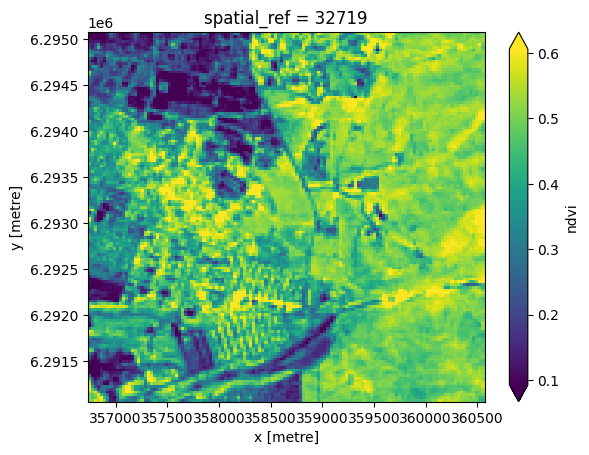

In [29]:
masked_mean.ndvi.plot(robust = True)

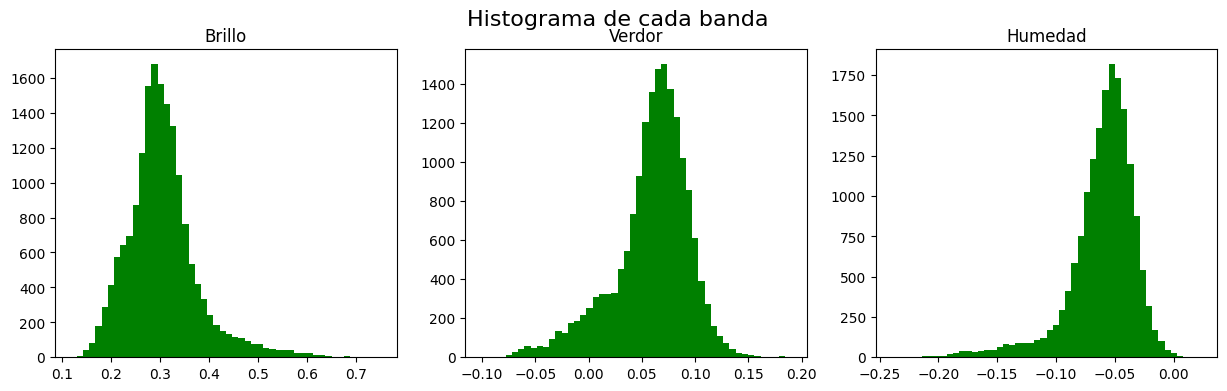

In [30]:
band_order = ["Brillo", "Verdor", "Humedad"]

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Histograma de cada banda", fontsize=16)

for band, ax in zip(band_order, axs.ravel()):
    masked_mean[band].plot.hist(ax=ax, bins=50, color="green")
    ax.set_title(band)
    ax.set_xlabel("")

/env/lib/python3.10/site-packages/rasterio/warp.py:344: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  _reproject(


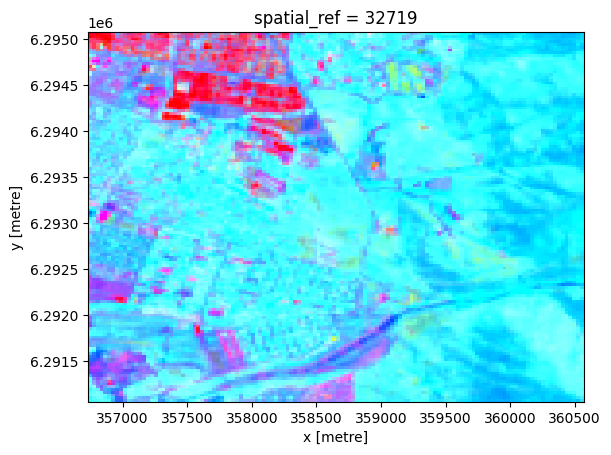

In [31]:
def plot_normRGB(img, vmax=0.6):
    # normalizar entre 0 y 1
    img = (img - img.min()) / (img.max() - img.min())
    img.to_array().plot.imshow(robust=True, vmax=vmax)

plot_normRGB(masked_mean[["Brillo", "Verdor", "Humedad"]])

In [32]:
client.close()

cluster.close()